In [3]:
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
from keras.callbacks import History
import matplotlib.pyplot as plt
import os
from tensorflow.keras.optimizers import Adam
from plain_neural_network import*

In [4]:
img_size = (1200, 480)
num_classes = 3

In [5]:
input_dir = "/work/ollie/bpanthi/nn_interpolation_new/"
input_file_paths = sorted(
        [
            os.path.join(input_dir, fname)
            for fname in os.listdir(input_dir)
        ])
test_x = xr.open_dataset(input_file_paths[0])
test_x = test_x.ssh.to_numpy()
test_x = np.float32(test_x)
test_x[test_x>1000] = 0
print(test_x.shape)
pred_x = np.reshape(test_x,(31,img_size[0],img_size[1],1))
print(pred_x.shape)

(31, 1200, 480)
(31, 1200, 480, 1)


In [6]:
input_dir = "/home/ollie/ssunar/segmentation_masks_3_years"
input_file_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
    ])
test_y = xr.open_dataset(input_file_paths[0])
test_y = test_y.seg_mask.to_numpy()
test_y = np.float32(test_y)
print(test_y.shape)

(31, 1200, 480)


In [7]:
file_path_save = "/work/ollie/bpanthi/NN_weights"

model = get_model(img_size, num_classes)
model.load_weights(file_path_save)

2022-04-18 02:43:22.540670: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /global/AWIsoft/proj/4.9.3/lib:/global/AWIsoft/intel//2018/intelpython2/lib
2022-04-18 02:43:22.540698: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-18 02:43:22.540740: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (prod-0121): /proc/driver/nvidia/version does not exist
2022-04-18 02:43:22.540951: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
preds_y = model.predict(pred_x)
mask = np.argmax(np.reshape(preds_y,(31,img_size[1],img_size[0],3)), axis=-1)
preds_y = np.reshape(mask,(31, img_size[0],img_size[1]))
preds_y = preds_y
print(preds_y.shape)
print(preds_y[0].shape)

2022-04-18 02:43:24.192260: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2285568000 exceeds 10% of free system memory.
2022-04-18 02:43:24.306447: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2285568000 exceeds 10% of free system memory.


(31, 1200, 480)
(1200, 480)


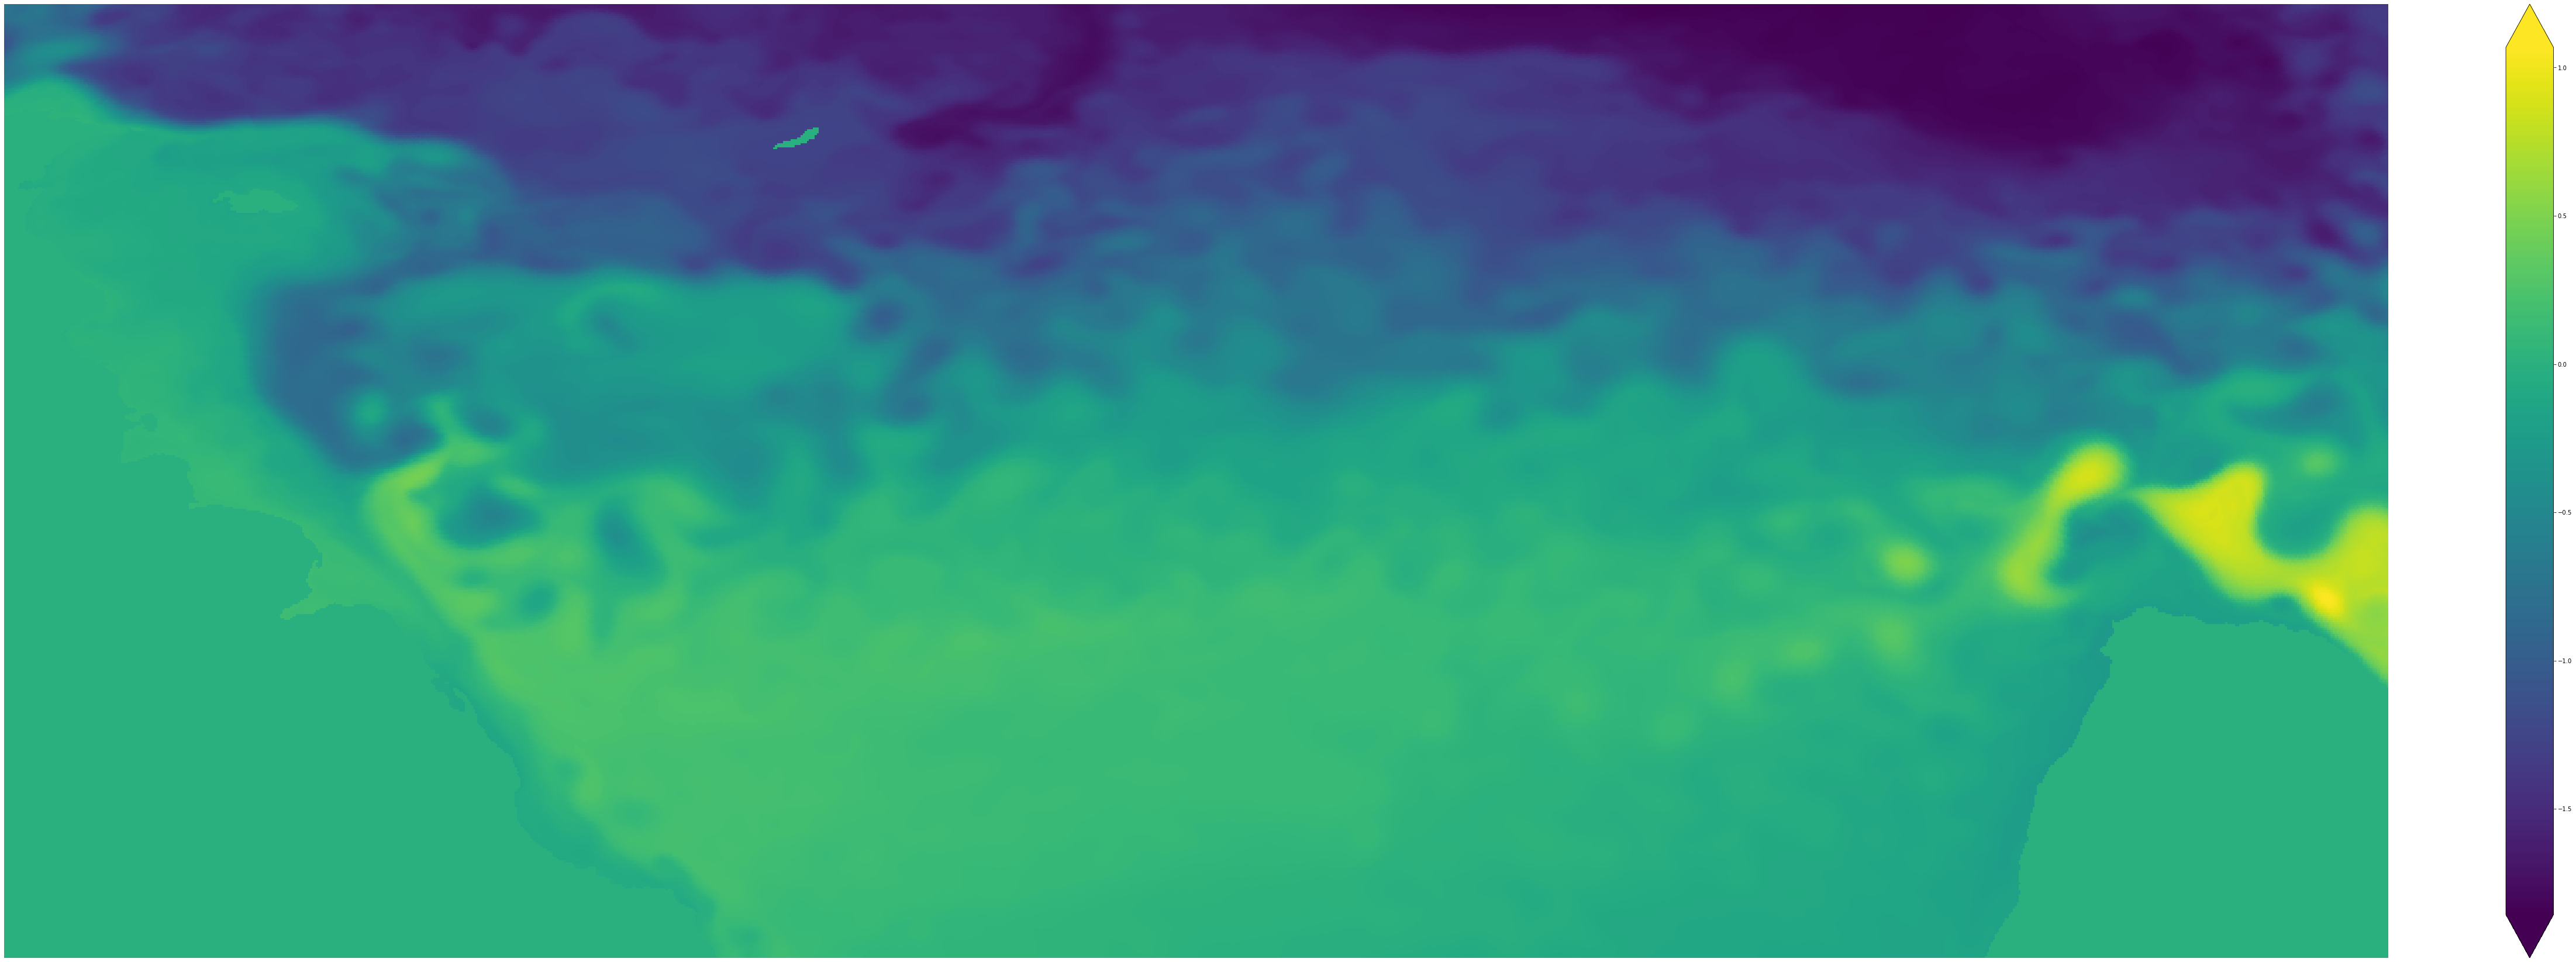

In [16]:
plt.figure(figsize=(90, 30))
plt.imshow(test_x[30].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off');

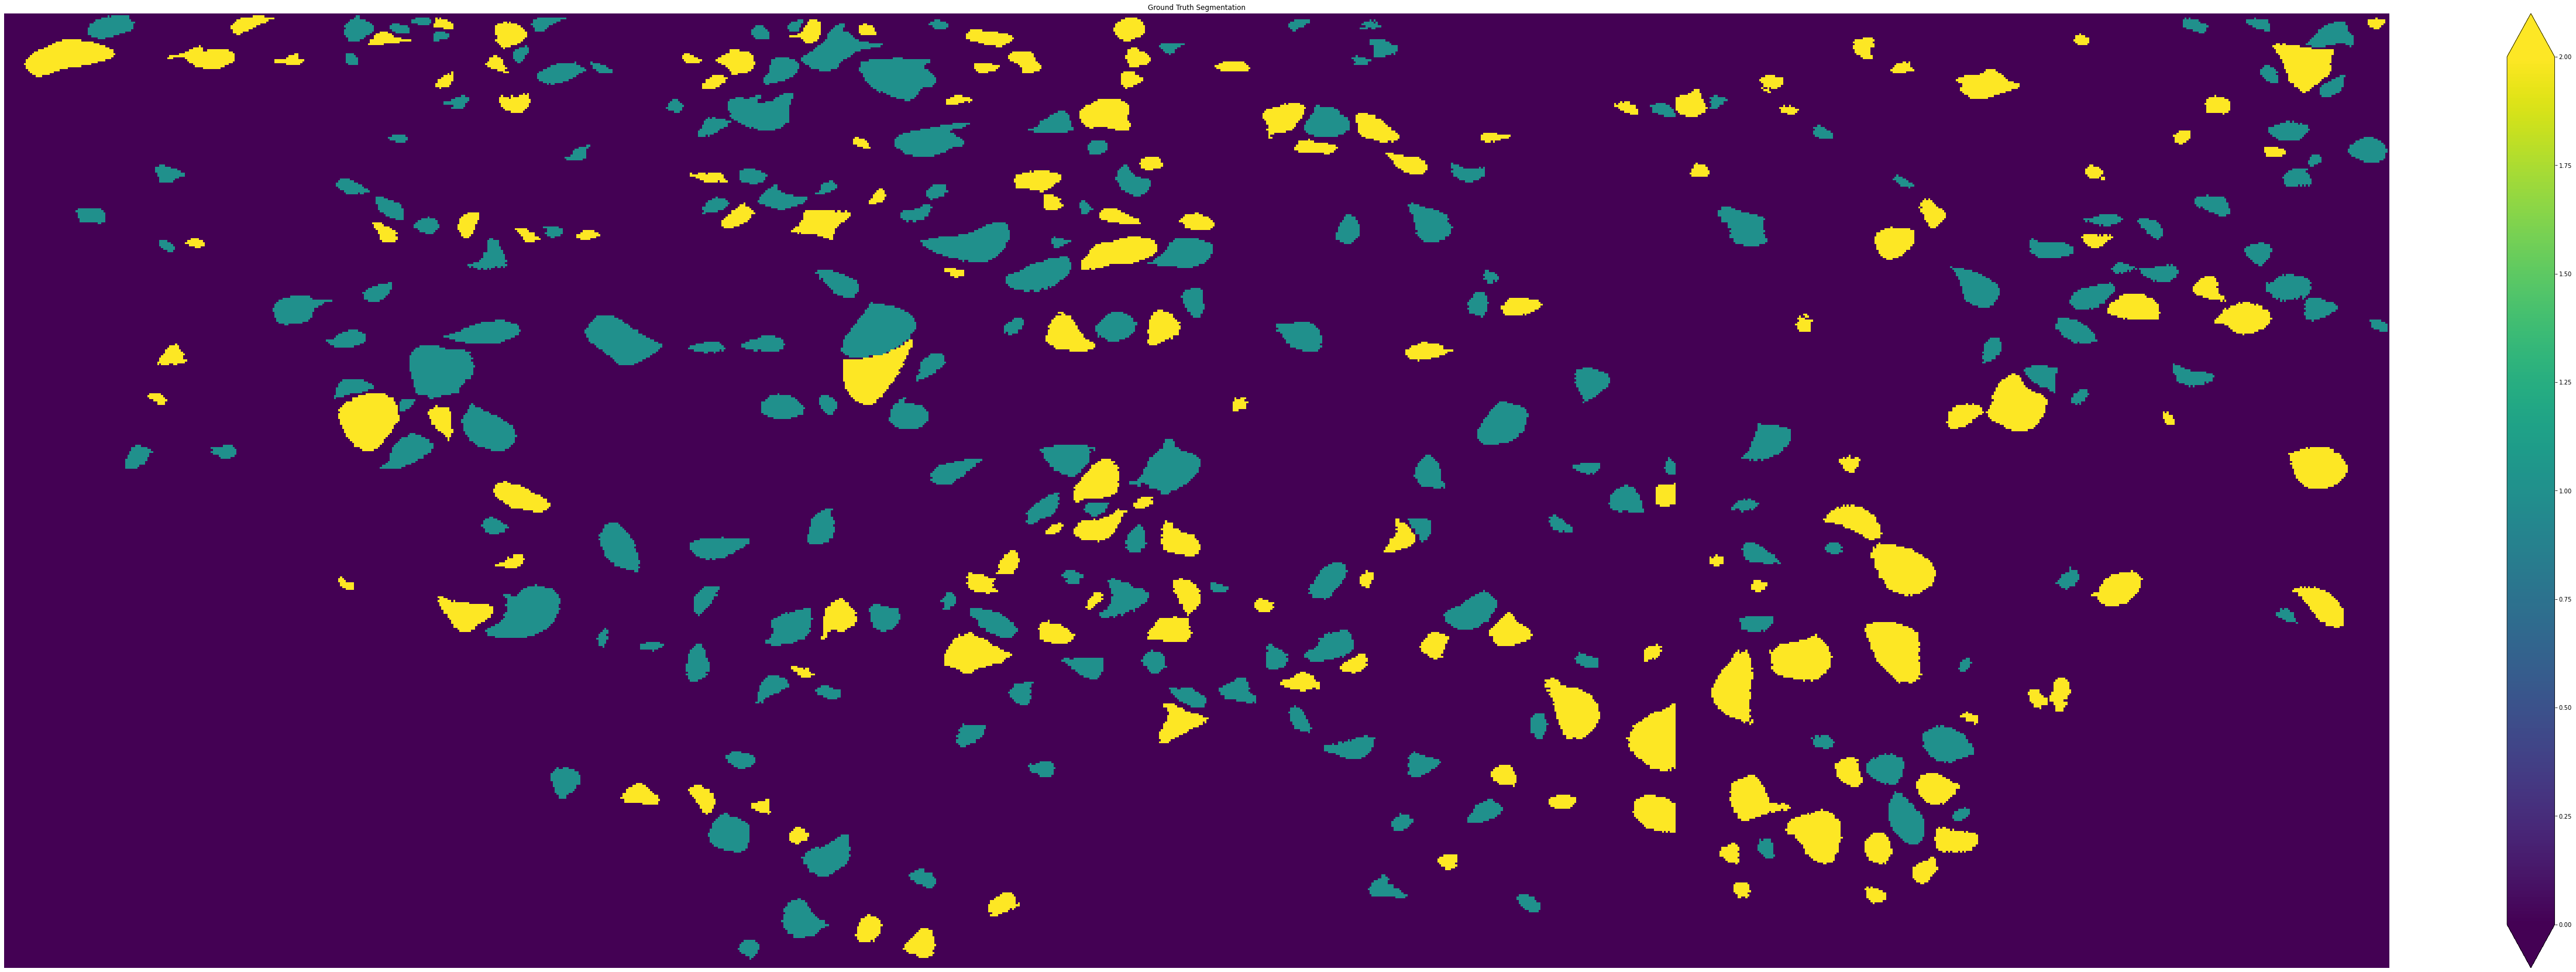

In [13]:
plt.figure(figsize=(90, 30))
plt.imshow(test_y[30].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Ground Truth Segmentation');

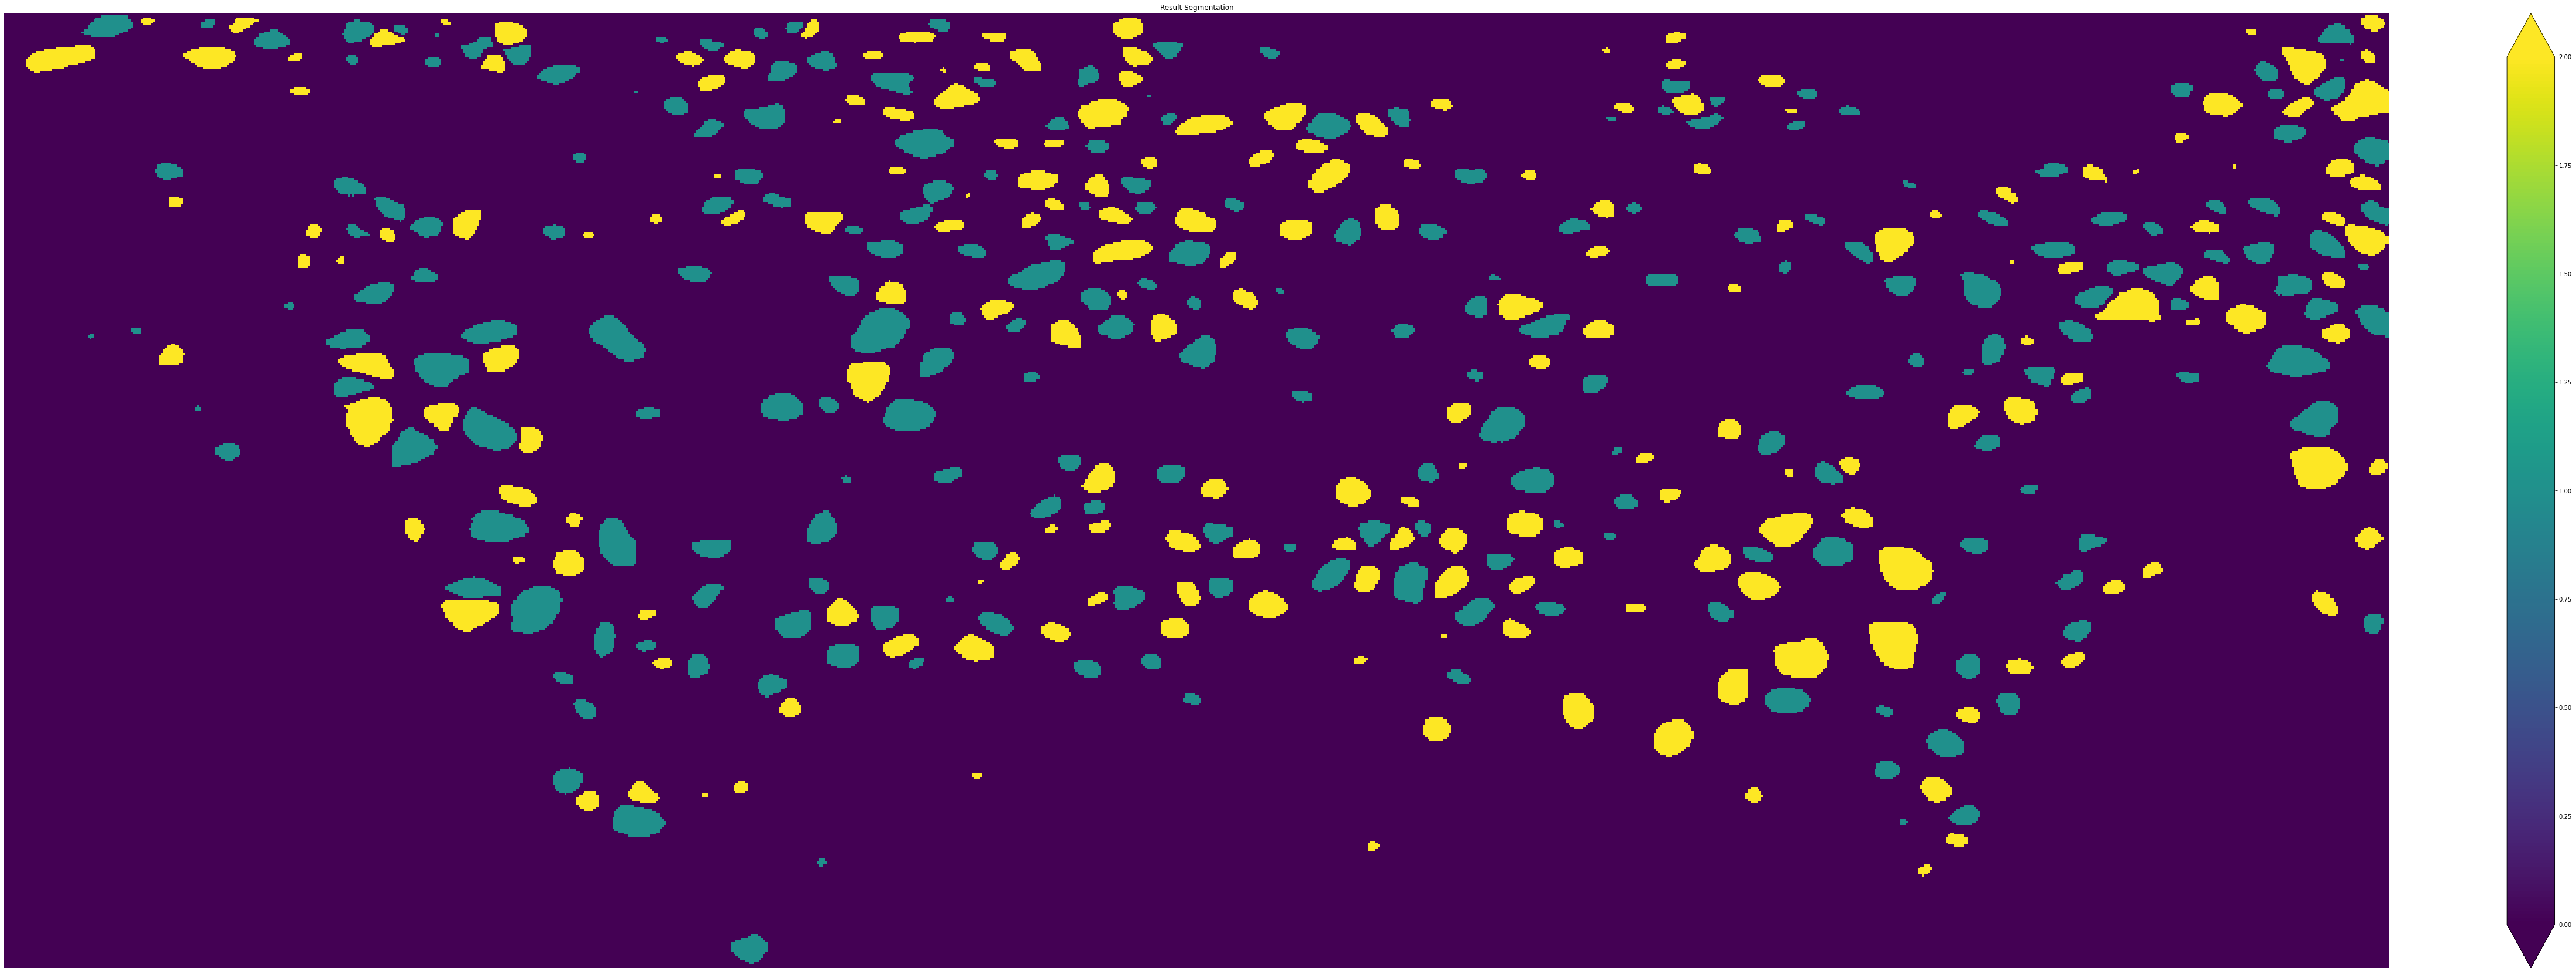

In [14]:
plt.figure(figsize=(90, 30))
plt.imshow(preds_y[30].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Result Segmentation');

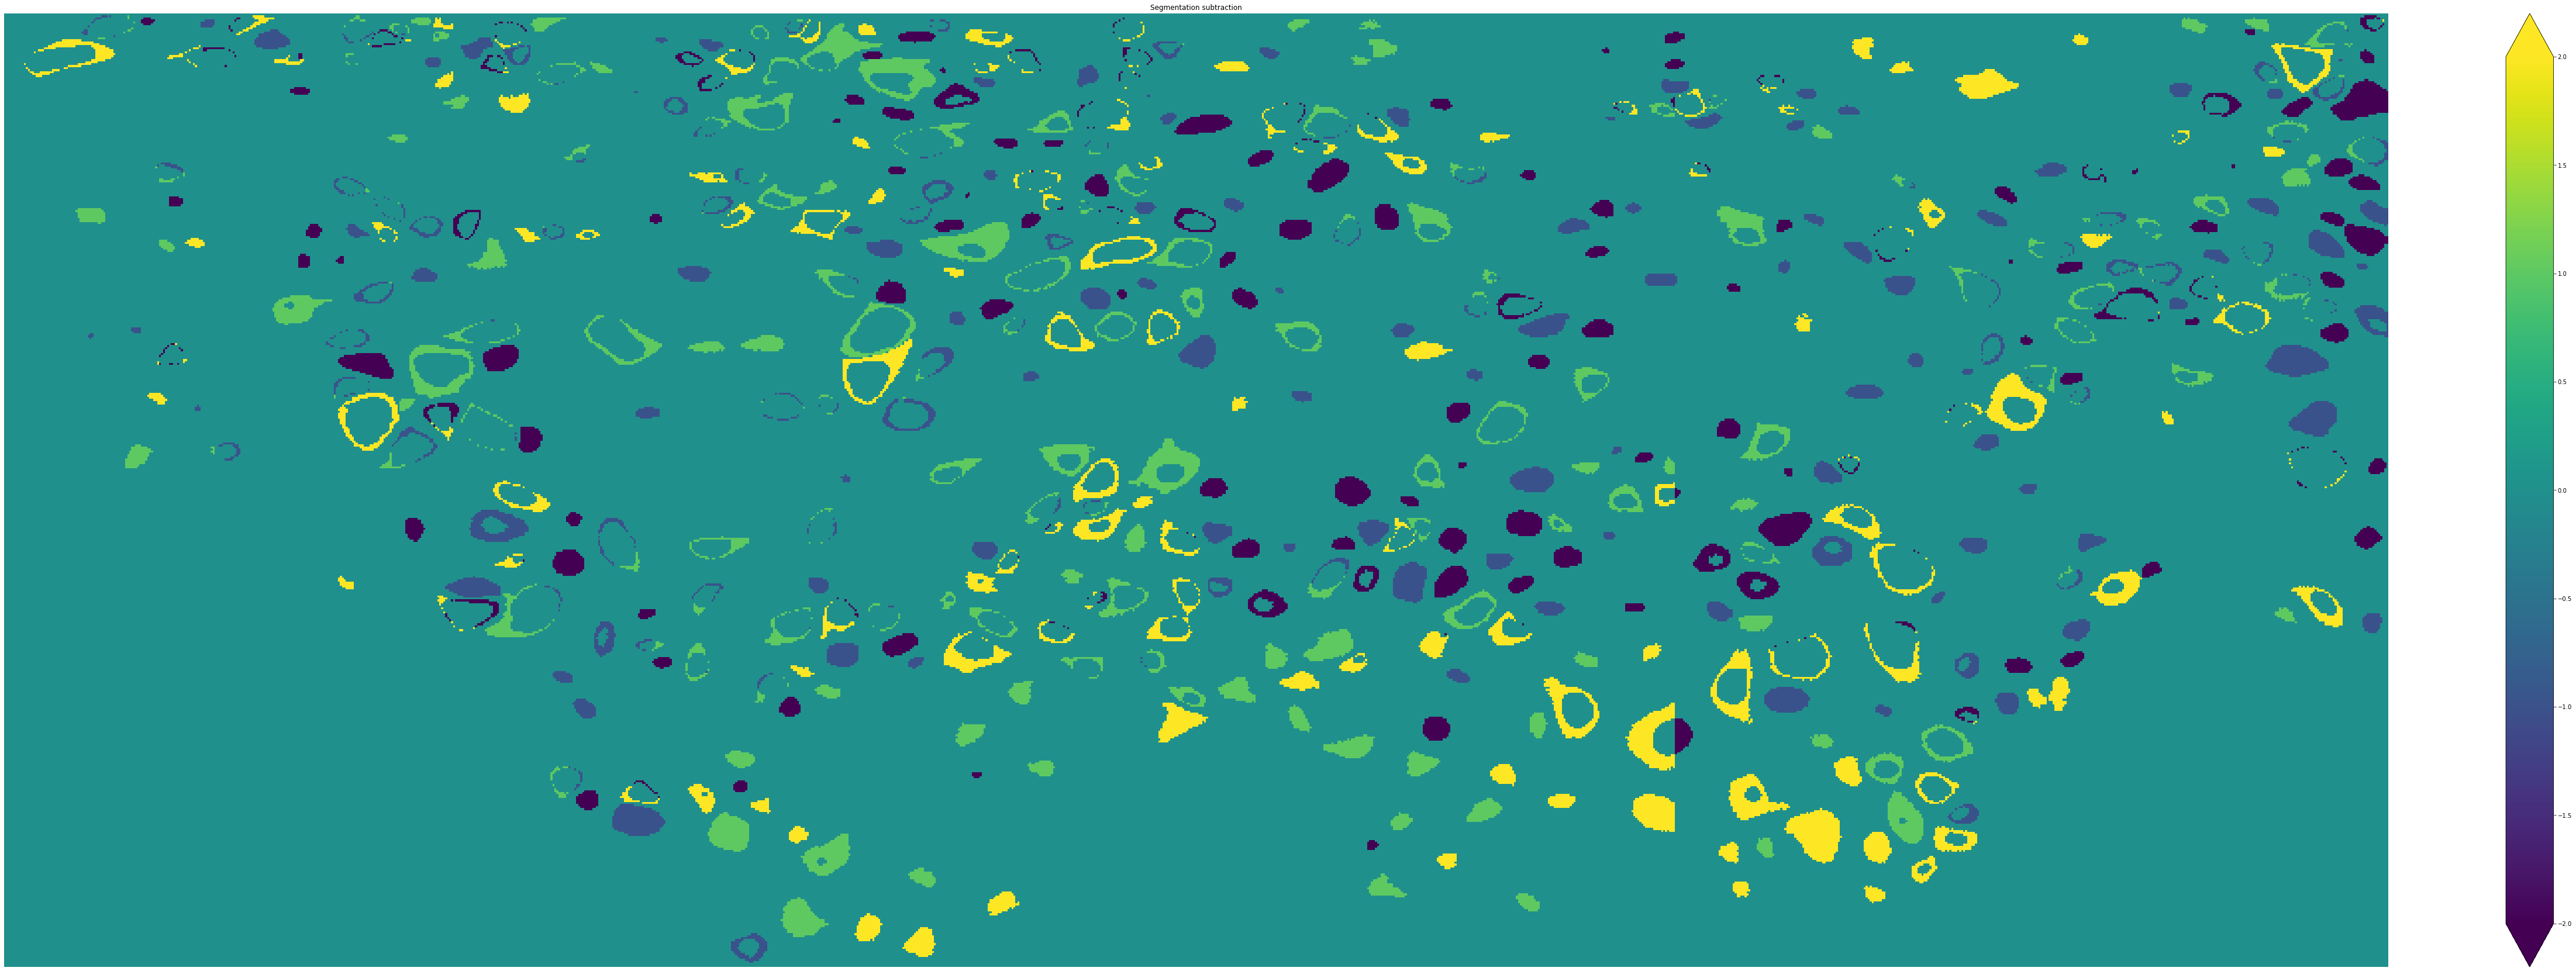

In [15]:
plt.figure(figsize=(90, 30))
plt.imshow(test_y[30].T-preds_y[30].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Segmentation subtraction');